In [1]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tensorly.random as tl_rand
import tensorly.kruskal_tensor as tl_kruskal
import numpy as np
from timeit import default_timer as timer
 
from BLOCK_SPG_CPD import bras_CPD
from BLOCK_SPG_CPD import ada_CPD

Using numpy backend.


In [2]:
# Set up
# Generate random latent factors
rank = 100
F = tl_rand.random_kruskal((300,300,300), rank, full=False, random_state=np.random.RandomState(seed=0))
X = tl_kruskal.kruskal_to_tensor(F)
B = 18
b = 10**-6
eps = 0
eta = 1
num_iterations = 75000

In [ ]:
# Run bras_cpd update
alpha = 0.1
start = timer()
res_error, mse = bras_CPD(F, X, rank, B, alpha, beta, num_iterations)
end = timer()

In [12]:
# Run ada_CPD update
start = timer()
res_error, mse, A = ada_CPD(F, X, rank, B, eta, b, eps, num_iterations)
end = timer()

iteration: 4999
iteration: 9999
iteration: 14999
iteration: 19999
iteration: 24999
iteration: 29999
iteration: 34999
iteration: 39999
iteration: 44999
iteration: 49999
iteration: 54999
iteration: 59999
iteration: 64999
iteration: 69999
iteration: 74999
33576.505853929004


In [29]:
# Run ada_CPD update
start = timer()
F = A
X = tl_kruskal.kruskal_to_tensor(F)
num_iterations = 25000
res_error, mse, A = ada_CPD(F, X, rank, B, eta, b, eps, num_iterations)
end = timer()

iteration: 4999
iteration: 9999
iteration: 14999
iteration: 19999
iteration: 24999


In [38]:
e = list(np.loadtxt("res_ada")) + res_error[1:]
m = list(np.loadtxt("mse_ada")) + mse[1:]

np.savetxt("res_ada.txt", e)
np.savetxt("mse_ada.txt", m)
np.savetxt("factorA_ada", A[0])
np.savetxt("factorB_ada", A[1])
np.savetxt("factorC_ada", A[2])

<Figure size 432x288 with 0 Axes>

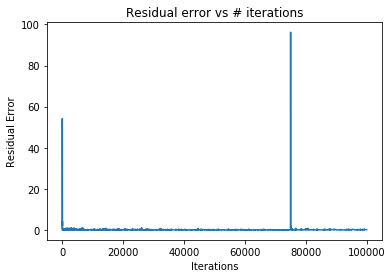

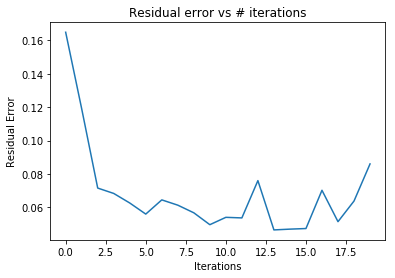

<Figure size 432x288 with 0 Axes>

In [41]:
x = range(100001)
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, e)  
plt.figure()

y_new = []
for i in range(0,100000, 5000):
    y_new.append(e[i])

x = range(len(y_new))
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, y_new)  
plt.figure()


<Figure size 432x288 with 0 Axes>

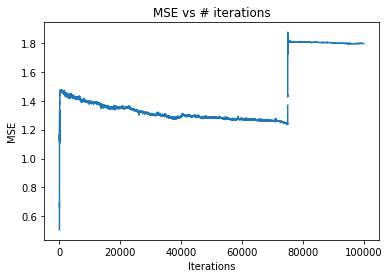

<Figure size 432x288 with 0 Axes>

In [42]:
x = range(100001)
plt.title('MSE vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.plot(x, m)  
plt.figure()

In [2]:
# Set up
rank = 100
F = tl_rand.random_kruskal((300,300,300), rank, full=False, random_state=np.random.RandomState(seed=0))
X = tl_kruskal.kruskal_to_tensor(F)
alphas = [0.1, 0.05, 0.01]
B = 18
beta = 10**-6
num_iterations = 100

In [5]:
# Run bras_cpd update
alpha = 0.1
start = timer()
res_error = bras_CPD(F, X, rank, B, alpha, beta, num_iterations)
end = timer()



In [8]:
np.savetxt("fixed_rand_error_bras_0.txt", res_error)

<Figure size 432x288 with 0 Axes>

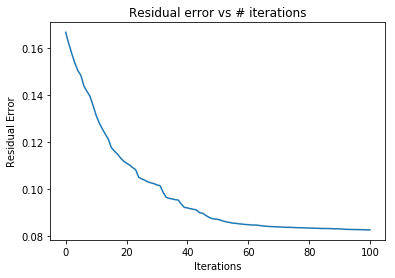

<Figure size 432x288 with 0 Axes>

In [9]:
l = np.loadtxt("fixed_rand_error_bras_0.txt")
x = range(len(l))
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, l)  
plt.figure()


In [63]:
# Set up
rank = 100
F = tl_rand.random_kruskal((300,300,300), rank, full=False, random_state=np.random.RandomState(seed=0))
X = tl_kruskal.kruskal_to_tensor(F)
alphas = [0.1, 0.05, 0.01]
B = 18
beta = 10**-6
num_iterations = 100000

In [ ]:
# Run bras_cpd update
alpha = 0.1
start = timer()
res_error, mse = bras_CPD(F, X, rank, B, alpha, beta, num_iterations)
end = timer()

In [62]:
print(end-start)

3.986813419003738
